# Iris Dataset Machine Learning Model

# Import all libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# load the dataset

In [3]:
data=pd.read_csv('iris (2).data',names=['sl','sw','pl','pw','class'])
data

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Predict shape of data

In [4]:
data.shape

(150, 5)

## Predict type of data columns

In [5]:
data.dtypes

sl       float64
sw       float64
pl       float64
pw       float64
class     object
dtype: object

## Check last column unique values

In [6]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visualisation of 4 columns sepal length,sepal width,petal length,petal width

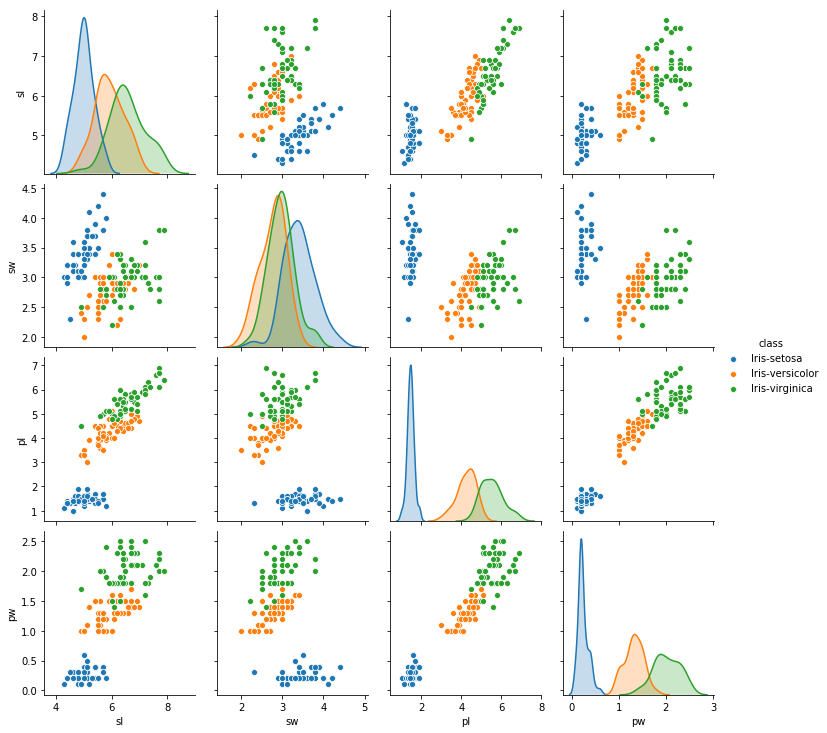

In [7]:
sns.pairplot(data,hue='class',vars=['sl','sw','pl','pw'])
plt.show()

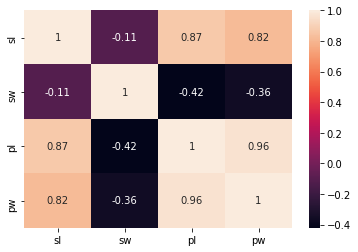

In [8]:
sns.heatmap(data.corr(),annot=True)

# Convert last column 'class' text values into number

In [9]:
l1=[]
for i in data['class']:
    if i=='Iris-setosa':
        l1.append(0)
    elif i=='Iris-virginica':
        l1.append(2)
    else:
        l1.append(1)
print(l1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [26]:
l=pd.Series(l1)
print(l)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64


# Extract the feature columns

In [25]:
X=data.iloc[:,:-1]
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Split extracted column into train/test split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,l,test_size=0.2,random_state=42)

# Model Making and its Evaluation

# 1) Logistic Regression Model and its Evaluation

In [13]:
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print(predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# 2) Kmeans Clustering Model and its Evaluation

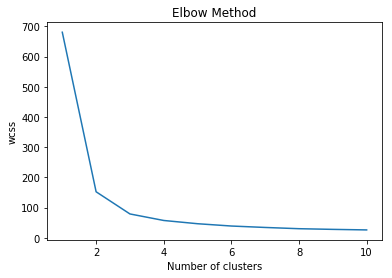

In [14]:
from sklearn.cluster import KMeans
list = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    list.append(km.inertia_)
plt.plot(range(1,11),list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

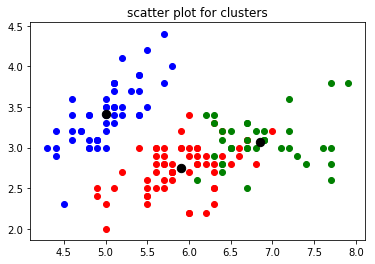

In [16]:
plt.scatter(X['sl'][y_kmeans==0],X['sw'][y_kmeans==0],c='red',label='iris-setosa')
plt.scatter(X['sl'][y_kmeans==1],X['sw'][y_kmeans==1],c='blue',label='iris-versicolor')
plt.scatter(X['sl'][y_kmeans==2],X['sw'][y_kmeans==2],c='green',label='iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70, c='black',label='centrid')
plt.title('scatter plot for clusters')
plt.show()

# 3) Support Vector Machine Model(SVM) with different kernels and its Evaluation

## a) Kernel = 'linear'

In [17]:
model1=SVC(kernel='linear')
model1.fit(x_train,y_train)
predictions=model1.predict(x_test)
print(predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


## b) Kernel ='rbf'

In [18]:
model2=SVC(kernel='rbf')
model2.fit(x_train,y_train)
predictions=model2.predict(x_test)
print(predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## c) Kernel ='poly'

In [19]:
model3=SVC(kernel='poly')
model3.fit(x_train,y_train)
predictions=model3.predict(x_test)
print(predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## d) Kernel ='Sigmoid'

In [20]:
model4=SVC(kernel='sigmoid')
model4.fit(x_train,y_train)
predictions=model4.predict(x_test)
print(predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

0.3


/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Visualisation

## Scatter plot of sepal length and sepal width

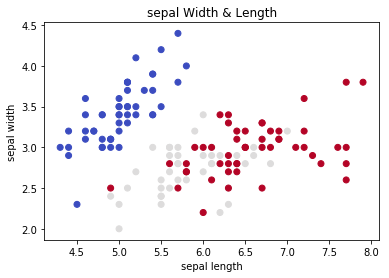

In [21]:
y=l
plt.scatter(np.array(X['sl']), np.array(X['sw']), c=y,cmap=plt.cm.coolwarm)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal Width & Length')
plt.show()

## Scatter plot of petal length and petal width

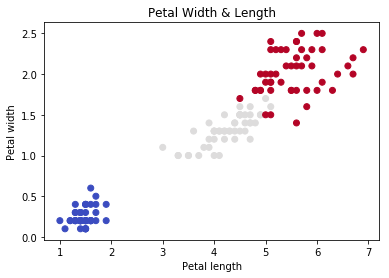

In [22]:
plt.scatter(np.array(X['pl']), np.array(X['pw']), c=l,cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width & Length')
plt.show()

## Visualisation of SVM model with different kernel of sepal length and sepal width

/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


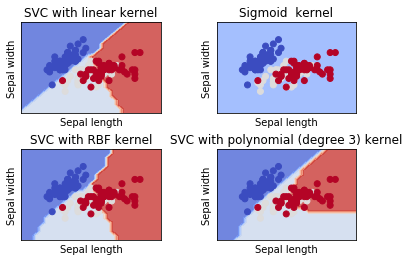

In [23]:
X=X[['sl','sw']]
y=l
c=1.0
linear_svc=SVC(kernel='linear',C=c).fit(X,y)
sig_svc=SVC(kernel='sigmoid',C=c).fit(X,y)
rbf_svc=SVC(kernel='rbf',C=c).fit(X,y)
poly_svc=SVC(kernel='poly',C=c).fit(X,y)

h=0.2
x_min, x_max = X['sl'].min() - 1, X['sl'].max() + 1
y_min, y_max = X['sw'].min() - 1, X['sw'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',  'Sigmoid  kernel' ,  'SVC with RBF kernel',    'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((linear_svc, sig_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(np.array(X['sl']), np.array(X['sw']), c=l, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

## Visulisation of SVM model with different kernel of petal length and petal width

/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


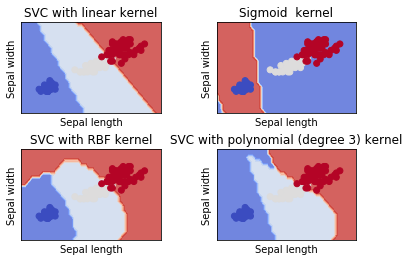

In [27]:
X=X[['pl','pw']]
y=l
c=1.0
linear_svc=SVC(kernel='linear',C=c).fit(X,y)
sig_svc=SVC(kernel='sigmoid',C=c).fit(X,y)
rbf_svc=SVC(kernel='rbf',C=c).fit(X,y)
poly_svc=SVC(kernel='poly',C=c).fit(X,y)

h=0.2
x_min, x_max = X['pl'].min() - 1, X['pl'].max() + 1
y_min, y_max = X['pw'].min() - 1, X['pw'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',  'Sigmoid  kernel' ,  'SVC with RBF kernel',    'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((linear_svc, sig_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(np.array(X['pl']), np.array(X['pw']), c=l, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()